In [1]:
import gen_correction
import numpy as np
import scipy
import matplotlib.pyplot as plt

plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 

		Required packages available.
	**********************************************************
	 
	 This module is for generating the wavenumber-dependent
	 intensity correction curve.

	 Main function is listed below.
	 
	**********************************************************
	gen_C0_C1 ( Ramanshift,  laser_nm, wl_spectra, norm_pnt,  
		        mask = None, set_mask_nan = None, export = None) 
	**********************************************************

	 REQUIRED PARAMETERS
			 Ramanshift = vector, the x-axis in relative wavenumbers
			 laser_nm = scalar, the laser wavelength in nanometers
			 wl_spectra = broadband whitelight spectra (1D or 2D)
			 norm_pnt =  scalar, normalization point (corrections will be set
			                to unity at this point
	  OPTIONAL PARAMETERS
			 mask = vector, mask wave for selecting specific region to fit
			 set_mask_nan= boolean, 1 will set the masked region in
			                the output correction to nan, 0 will not do so.
			 export = 0 or 

# Loading data

In [2]:
# load files
wavenumber =  np.loadtxt("Wavenumber_axis.txt")
wl = np.loadtxt("wl.txt")
original_mask = np.loadtxt("mask.txt")

mask = original_mask.astype(bool)

mask_final =  np.invert(mask)

In [3]:
print(original_mask)    #  value of 0 at the mask region
print(mask_final)       # scipy requires boolean true at the mask region 
print(type(mask_final))

[1. 1. 1. ... 1. 1. 1.]
[False False False ... False False False]
<class 'numpy.ndarray'>


---
# Plotting the loaded data

### 1. Broadband white light specta 

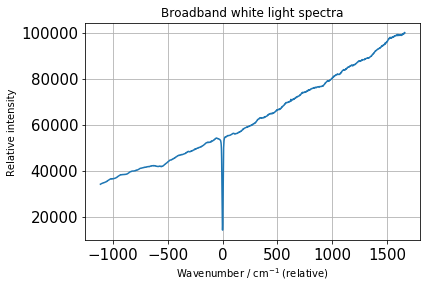

In [4]:
    
    # plot the broadband whitelight spectrum against relative wavenumbers 
    
    plt.plot( wavenumber, wl,'-')
    plt.grid()
    #plt.ylim([0, 1.5])
    plt.title('Broadband white light spectra' )
    plt.xlabel('Wavenumber / cm$^{-1}$ (relative)')
    plt.ylabel('Relative intensity')
    plt.show()

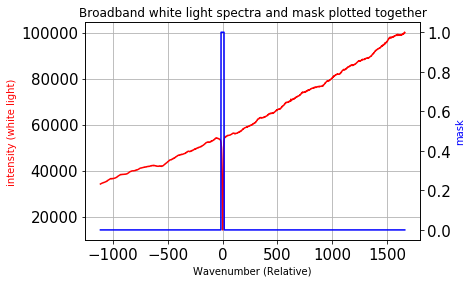

In [5]:
    # plot the broadband whitelight spectrum against relative wavenumbers 
    
    fig, ax1 = plt.subplots()

    ax2 = ax1.twinx()
    ax1.plot(wavenumber, wl, 'r-')
    ax2.plot(wavenumber, mask_final, 'b-')
    
    ax1.set_xlabel('Wavenumber (Relative)')
    ax1.set_ylabel('intensity (white light)', color='r')
    ax2.set_ylabel('mask', color='b')    
    plt.title('Broadband white light spectra and mask plotted together' )
    ax1.grid()
    plt.show()

---

### Obtaining the correction

	 Mask is available. Using mask and fitting.
	 Optimized coefs : [3.33376451e-15 3.76715150e+01]


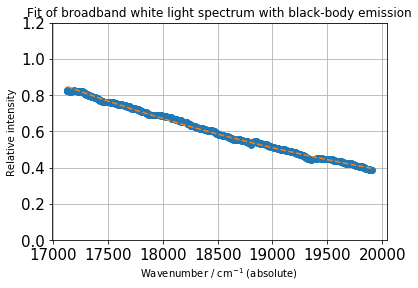

In [39]:
# generating the (C0/C1) correction here

corr=gen_correction.gen_C0_C1 (wavenumber, 532.2, wl, 581, mask=mask_final, set_mask_nan=1 )

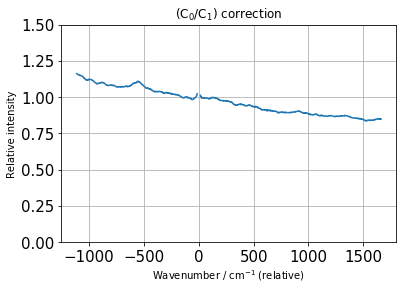

In [15]:
    
    # plot the obtained correction against relative wavenumbers 
    
    plt.plot( wavenumber, corr,'-')
    plt.grid()
    plt.ylim([0, 1.5])
    plt.title('(C$_{0}$/C$_{1}$) correction' )
    plt.xlabel('Wavenumber / cm$^{-1}$ (relative)')
    plt.ylabel('Relative intensity')
    

    plt.show()